In [101]:
# importing the libraries for the assignment
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import os
from sklearn.preprocessing import PolynomialFeatures

In [102]:
# Reading of the data set 
HP = pd.read_csv('C:\\Users\\manas.modi\\Desktop\\train.csv')

In [103]:
# Understanding the data set
# Checkingfor Nulls and NA
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
# Checking data flow for jut top 5 rows
HP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [105]:
# Visualising the whole data set
HP

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [106]:
# Checking the shape of the data set 
HP.shape

(1460, 81)

In [107]:
# Check on null values in for each variable in the dataset
HP.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [108]:
# Understanding the description of the data set  
HP.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [109]:
HP

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Data Cleaning

In [110]:
# Checking for variables those who have null values 
HP.isnull().sum()[(HP.isnull().sum()>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [111]:
#Dropping Insignificant variables on the basis of High level of null values. Almost more than 70%
HP = HP.drop('Alley',axis=1)
HP = HP.drop('PoolQC',axis=1)
HP = HP.drop('MiscFeature',axis=1)

In [112]:
#Checking the shape after dorpping variables 
HP.shape

(1460, 78)

In [113]:
# Checking the variables for their values and their counts 
# These varibales have been selected and checked on the basis of data filtering in Excel
HP.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [114]:
HP.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [115]:
HP.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [116]:
HP.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [117]:
HP.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [118]:
HP.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [119]:
HP.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [120]:
HP.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [121]:
HP.ScreenPorch.value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [122]:
HP.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [123]:
HP.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [124]:
HP.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [125]:
HP.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [126]:
HP.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [127]:
HP.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [128]:
HP.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [129]:
HP.LowQualFinSF.value_counts()

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [130]:
# Dropping the insignificant variables which will affect our analysis
# The below variables will not affect the depedent variable ('Sales Price') as they have one value count in major
HP = HP.drop('LowQualFinSF',axis =1)
HP = HP.drop('Street',axis =1)
HP = HP.drop('Utilities',axis =1)
HP = HP.drop('Condition2',axis =1)
HP = HP.drop('LandSlope',axis =1)
HP = HP.drop('Heating',axis =1)
HP = HP.drop('CentralAir',axis =1)
HP = HP.drop('Electrical',axis =1)
HP = HP.drop('Functional',axis =1)
HP = HP.drop('ScreenPorch',axis =1)
HP = HP.drop('3SsnPorch',axis =1)
HP = HP.drop('PoolArea',axis =1)
HP = HP.drop('MiscVal',axis =1)
HP = HP.drop('PavedDrive',axis =1)
HP = HP.drop('RoofMatl',axis =1)
HP = HP.drop('BsmtHalfBath',axis =1)
HP = HP.drop('GarageCond',axis =1)
HP = HP.drop('KitchenAbvGr',axis =1)

In [131]:
# Checking the shape after dropping lot of variables
HP.shape

(1460, 60)

In [132]:
#Dropping ID as it is not part of our analysis and it only provides ID index
HP = HP.drop('Id',axis =1)

## EDA

In [133]:
#Replacing the NAN values into "No Fench" as was getting NAN cant be converted in the earlier analysis 
HP["Fence"] = HP["Fence"].astype('str')
HP["Fence"] = HP["Fence"].str.replace("nan", "No Fence")


In [134]:
#Filling relevant variables wih relavent values 
HP["GarageFinish"] = HP["GarageFinish"].fillna("No Garage")

In [135]:
HP["LotFrontage"] = HP["LotFrontage"].replace(np.nan, HP["LotFrontage"].median())

In [136]:
HP["BsmtQual"] = HP["BsmtQual"].fillna("None")

In [137]:
HP["BsmtCond"] = HP["BsmtCond"].fillna("None")

In [138]:
HP["BsmtExposure"] = HP["BsmtExposure"].fillna("None")

In [139]:
HP["BsmtFinType1"] = HP["BsmtFinType1"].fillna("None")

In [140]:
HP["BsmtFinType2"] = HP["BsmtFinType2"].fillna("None")

In [141]:
#Check on Basement variables
HP_BT = HP[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

In [142]:
HP_BT

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
0          Gd       TA           No          GLQ          Unf         706   
1          Gd       TA           Gd          ALQ          Unf         978   
2          Gd       TA           Mn          GLQ          Unf         486   
3          TA       Gd           No          ALQ          Unf         216   
4          Gd       TA           Av          GLQ          Unf         655   
...       ...      ...          ...          ...          ...         ...   
1455       Gd       TA           No          Unf          Unf           0   
1456       Gd       TA           No          ALQ          Rec         790   
1457       TA       Gd           No          GLQ          Unf         275   
1458       TA       TA           Mn          GLQ          Rec          49   
1459       TA       TA           No          BLQ          LwQ         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
0              0        150          856  
1              0        284         1262  
2              0        434          920  
3              0        540          756  
4              0        490         1145  
...          ...        ...          ...  
1455           0        953          953  
1456         163        589         1542  
1457           0        877         1152  
1458        1029          0         1078  
1459         290        136         1256  

[1460 rows x 9 columns]

In [143]:
plt.figure(figsize=(30, 25))
sns.pairplot(HP_BT)
plt.show()

<Figure size 3000x2500 with 0 Axes>

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

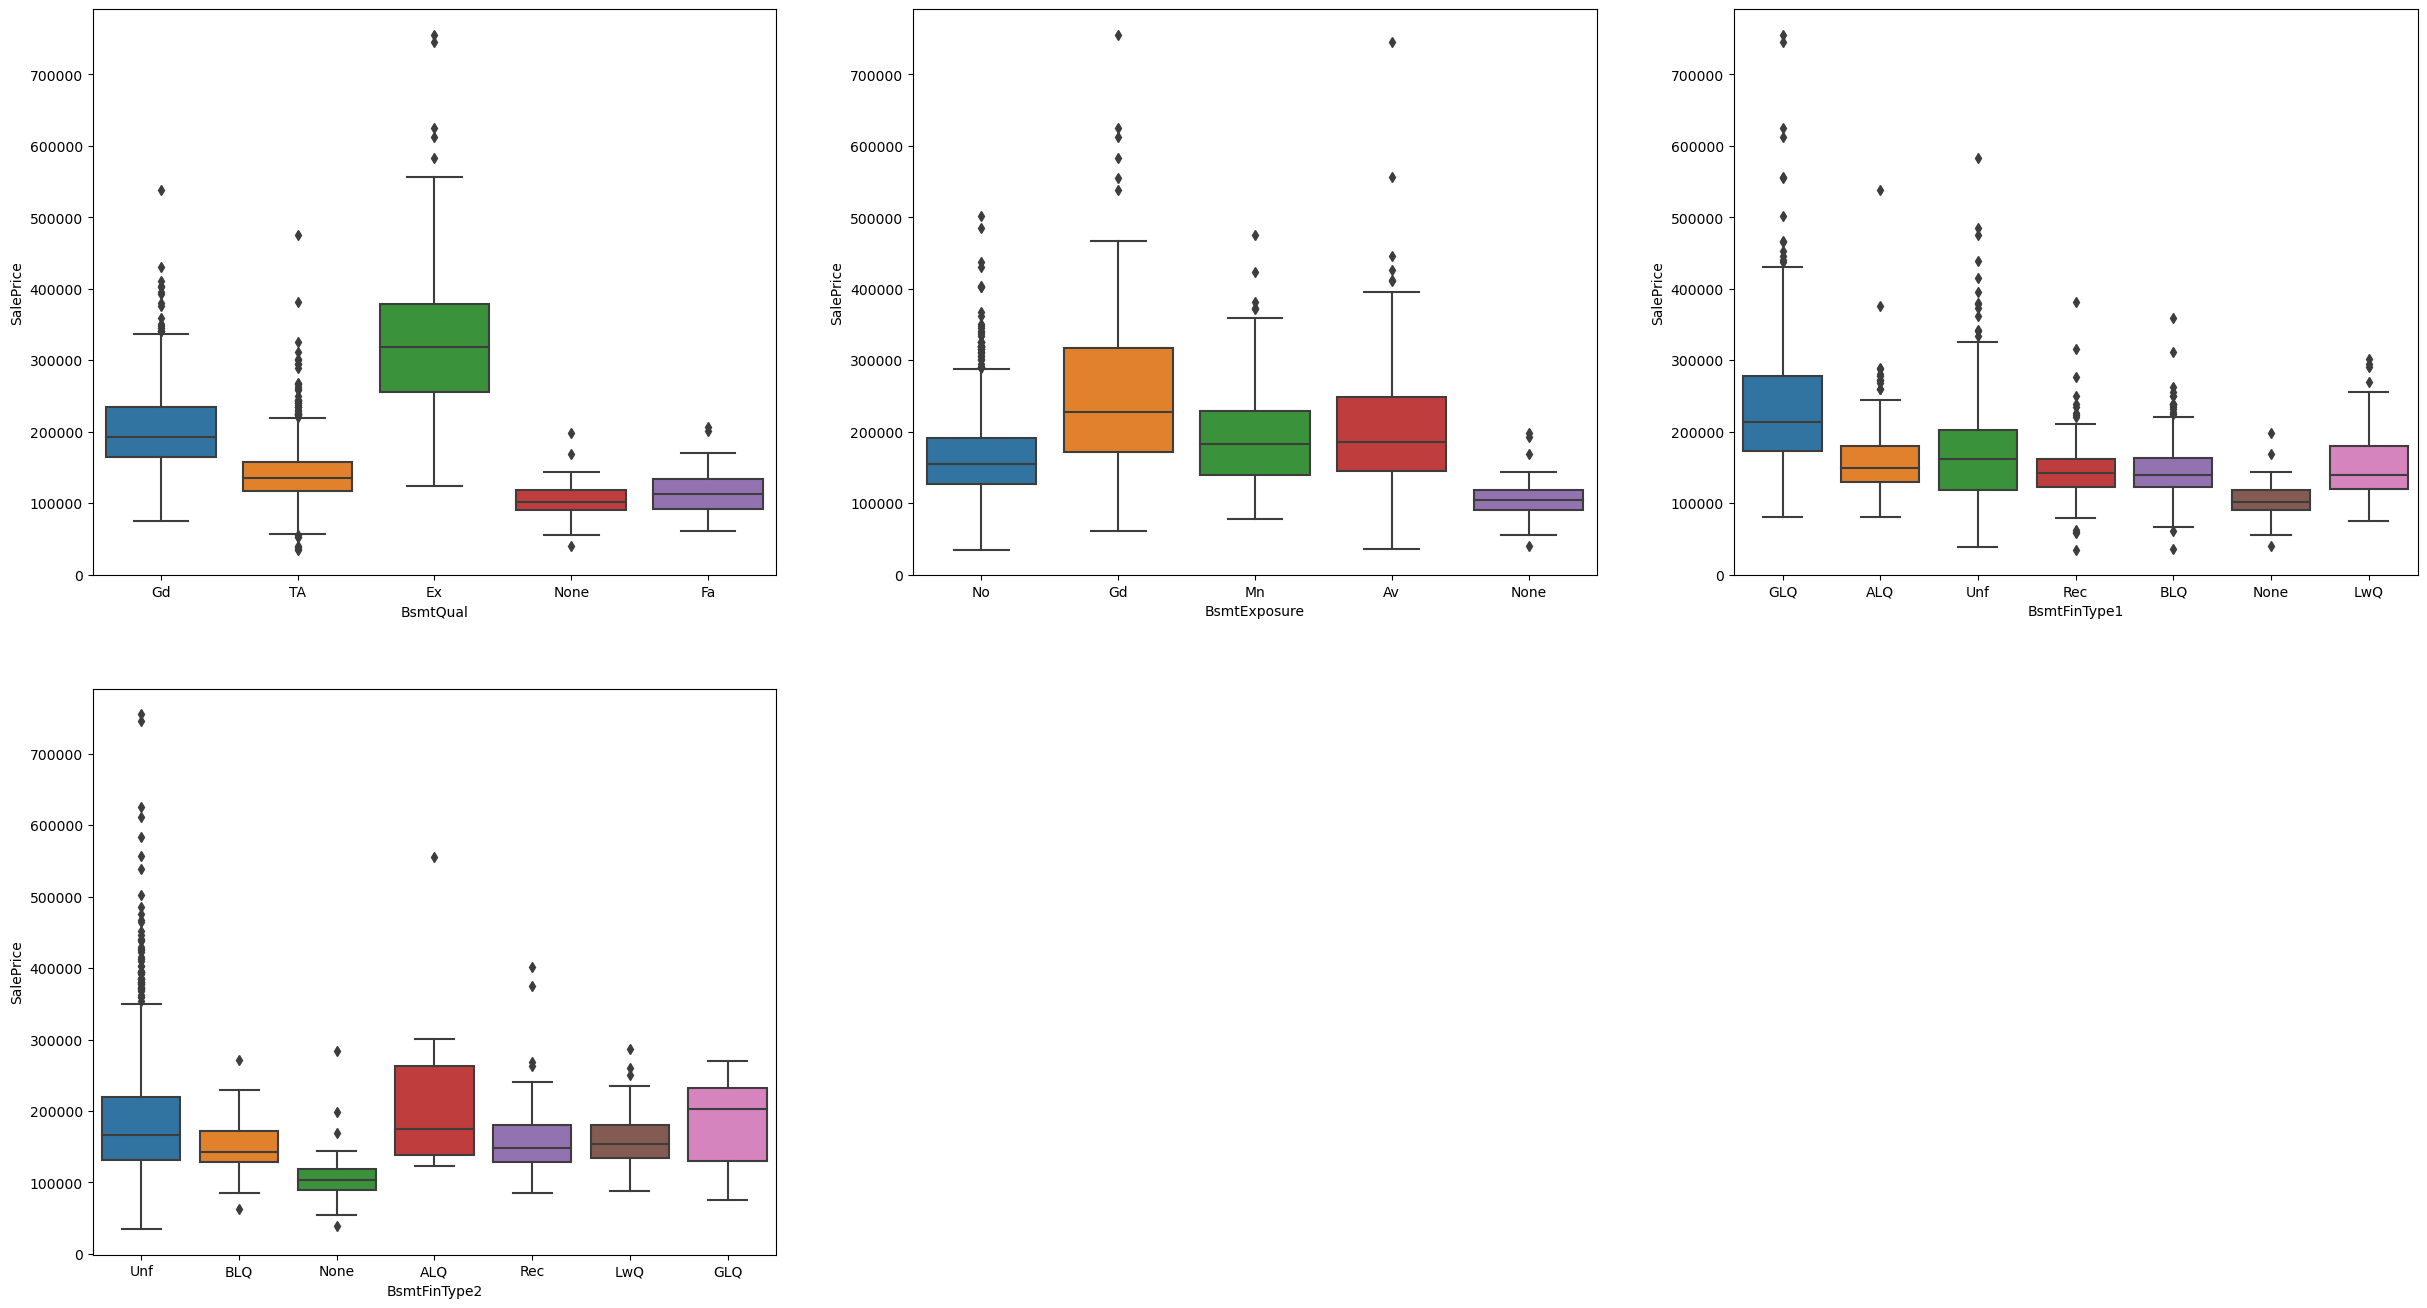

In [144]:
plt.figure(figsize=(30, 25))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = HP)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = HP)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = HP)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = HP)

In [145]:
# On the basisof above analysis some varibales need to be dropped 
HP = HP.drop("BsmtFinSF1", axis=1)
HP = HP.drop("BsmtFinSF2", axis=1)
HP = HP.drop("BsmtUnfSF", axis=1)
HP= HP.drop("BsmtFinType2", axis=1)
HP= HP.drop("BsmtFinType1", axis=1)
HP= HP.drop("BsmtExposure", axis=1)

In [146]:
HP.shape

(1460, 53)

In [147]:
# Changing the data type
HP["MasVnrArea"] = HP["MasVnrArea"].replace(np.nan, HP["MasVnrArea"].median())
HP["MasVnrArea"] = HP["MasVnrArea"].astype('int')

In [148]:
HP.shape

(1460, 53)

In [149]:
HP["GarageYrBlt"] = HP["GarageYrBlt"].fillna(0)

In [150]:
#Replacing the NAN values into "No Garage" as was getting NAN cant be converted in the earlier analysis 
HP["GarageType"] = HP["GarageType"].astype('str')
HP["GarageType"] = HP["GarageType"].str.replace("nan", "No Garage")

In [151]:
#Replacing the NAN values into "No Garage" as was getting NAN cant be converted in the earlier analysis 
HP["GarageQual"] = HP["GarageQual"].str.replace("nan", "No Garage")

In [152]:
HP.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [153]:
HP.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [154]:
HP.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [155]:
HP.MasVnrArea.value_counts()

0      869
180      8
72       8
108      8
120      7
      ... 
562      1
89       1
921      1
762      1
119      1
Name: MasVnrArea, Length: 327, dtype: int64

In [156]:
HP= HP.drop("GarageQual", axis=1)

In [157]:
HP = HP.drop("MasVnrArea", axis=1)

In [158]:
HP

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... GarageArea  WoodDeckSF  \
0       Inside      CollgCr       Norm     1Fam  ...        548           0   
1          FR2      Veenker      Feedr     1Fam  ...        460         298   
2       Inside      CollgCr       Norm     1Fam  ...        608           0   
3       Corner      Crawfor       Norm     1Fam  ...        642           0   
4          FR2      NoRidge       Norm     1Fam  ...        836         192   
...        ...          ...        ...      ...  ...        ...         ...   
1455    Inside      Gilbert       Norm     1Fam  ...        460           0   
1456    Inside       NWAmes       Norm     1Fam  ...        500         349   
1457    Inside      Crawfor       Norm     1Fam  ...        252           0   
1458    Inside        NAmes       Norm     1Fam  ...        240         366   
1459    Inside      Edwards       Norm     1Fam  ...        276         736   

      OpenPorchSF  EnclosedPorch     Fence MoSold YrSold SaleType  \
0              61              0  No Fence      2   2008       WD   
1               0              0  No Fence      5   2007       WD   
2              42              0  No Fence      9   2008       WD   
3              35            272  No Fence      2   2006       WD   
4              84              0  No Fence     12   2008       WD   
...           ...            ...       ...    ...    ...      ...   
1455           40              0  No Fence      8   2007       WD   
1456            0              0     MnPrv      2   2010       WD   
1457           60              0     GdPrv      5   2010       WD   
1458            0            112  No Fence      4   2010       WD   
1459           68              0  No Fence      6   2008       WD   

     SaleCondition SalePrice  
0           Normal    208500  
1           Normal    181500  
2           Normal    223500  
3          Abnorml    140000  
4           Normal    250000  
...            ...       ...  
1455        Normal    175000  
1456        Normal    210000  
1457        Normal    266500  
1458        Normal    142125  
1459        Normal    147500  

[1460 rows x 51 columns]

In [159]:
HP["FireplaceQu"] = HP["FireplaceQu"].fillna("No Fireplace")

In [160]:
HP['MasVnrType'] = HP['MasVnrType'].fillna("None")

In [161]:
HP.shape

(1460, 51)

In [162]:
# Checking on the correlation within the variables
# High correlated variables can be removed
plt.figure(figsize =(20,12))
sns.heatmap(HP.corr(), annot =True)
plt.show()

In [163]:
# Checking on the correlation within the variables as earlier with a change in colour for better visualisation
# High correlated variables can be removed
plt.figure(figsize =(20,12))
sns.heatmap(HP.corr(), annot =True, cmap="Reds")
plt.show()

# Data Visualisation

In [164]:
#Checking the Sales Price graph with different number of bins and checking on the difference in the graphs
HP['SalePrice'] = np.log1p(HP['SalePrice'])

plt.title('SalePrice')
sns.distplot(HP['SalePrice'], bins=20)
plt.show()

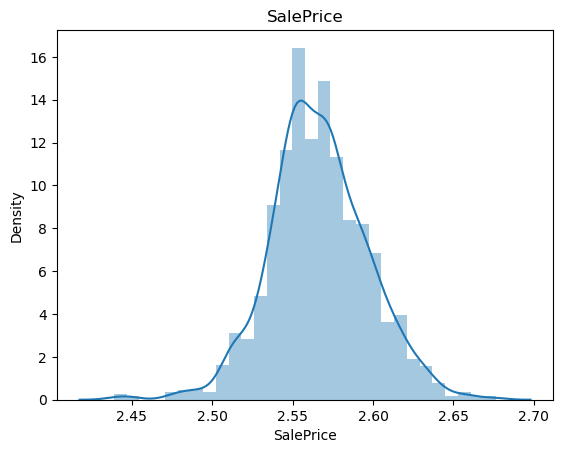

In [165]:
HP['SalePrice'] = np.log1p(HP['SalePrice'])

plt.title('SalePrice')
sns.distplot(HP['SalePrice'], bins=30)
plt.show()

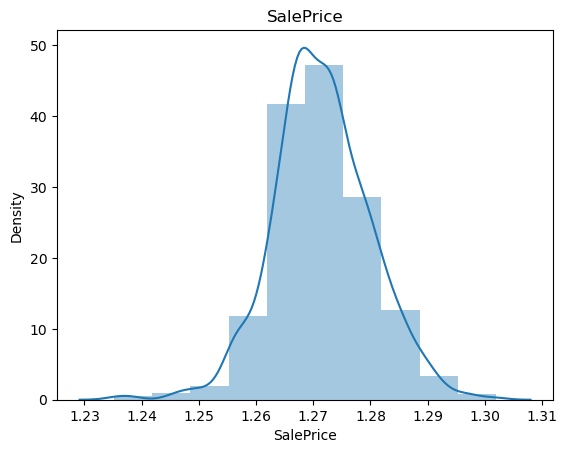

In [166]:
HP['SalePrice'] = np.log1p(HP['SalePrice'])

plt.title('SalePrice')
sns.distplot(HP['SalePrice'], bins=10)
plt.show()

In [167]:
# Check on various similar type of parameters by dividing them into 2 parts 
HPNumb1=HP[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

HPNumb2=HP[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',               
'OpenPorchSF','SalePrice']]

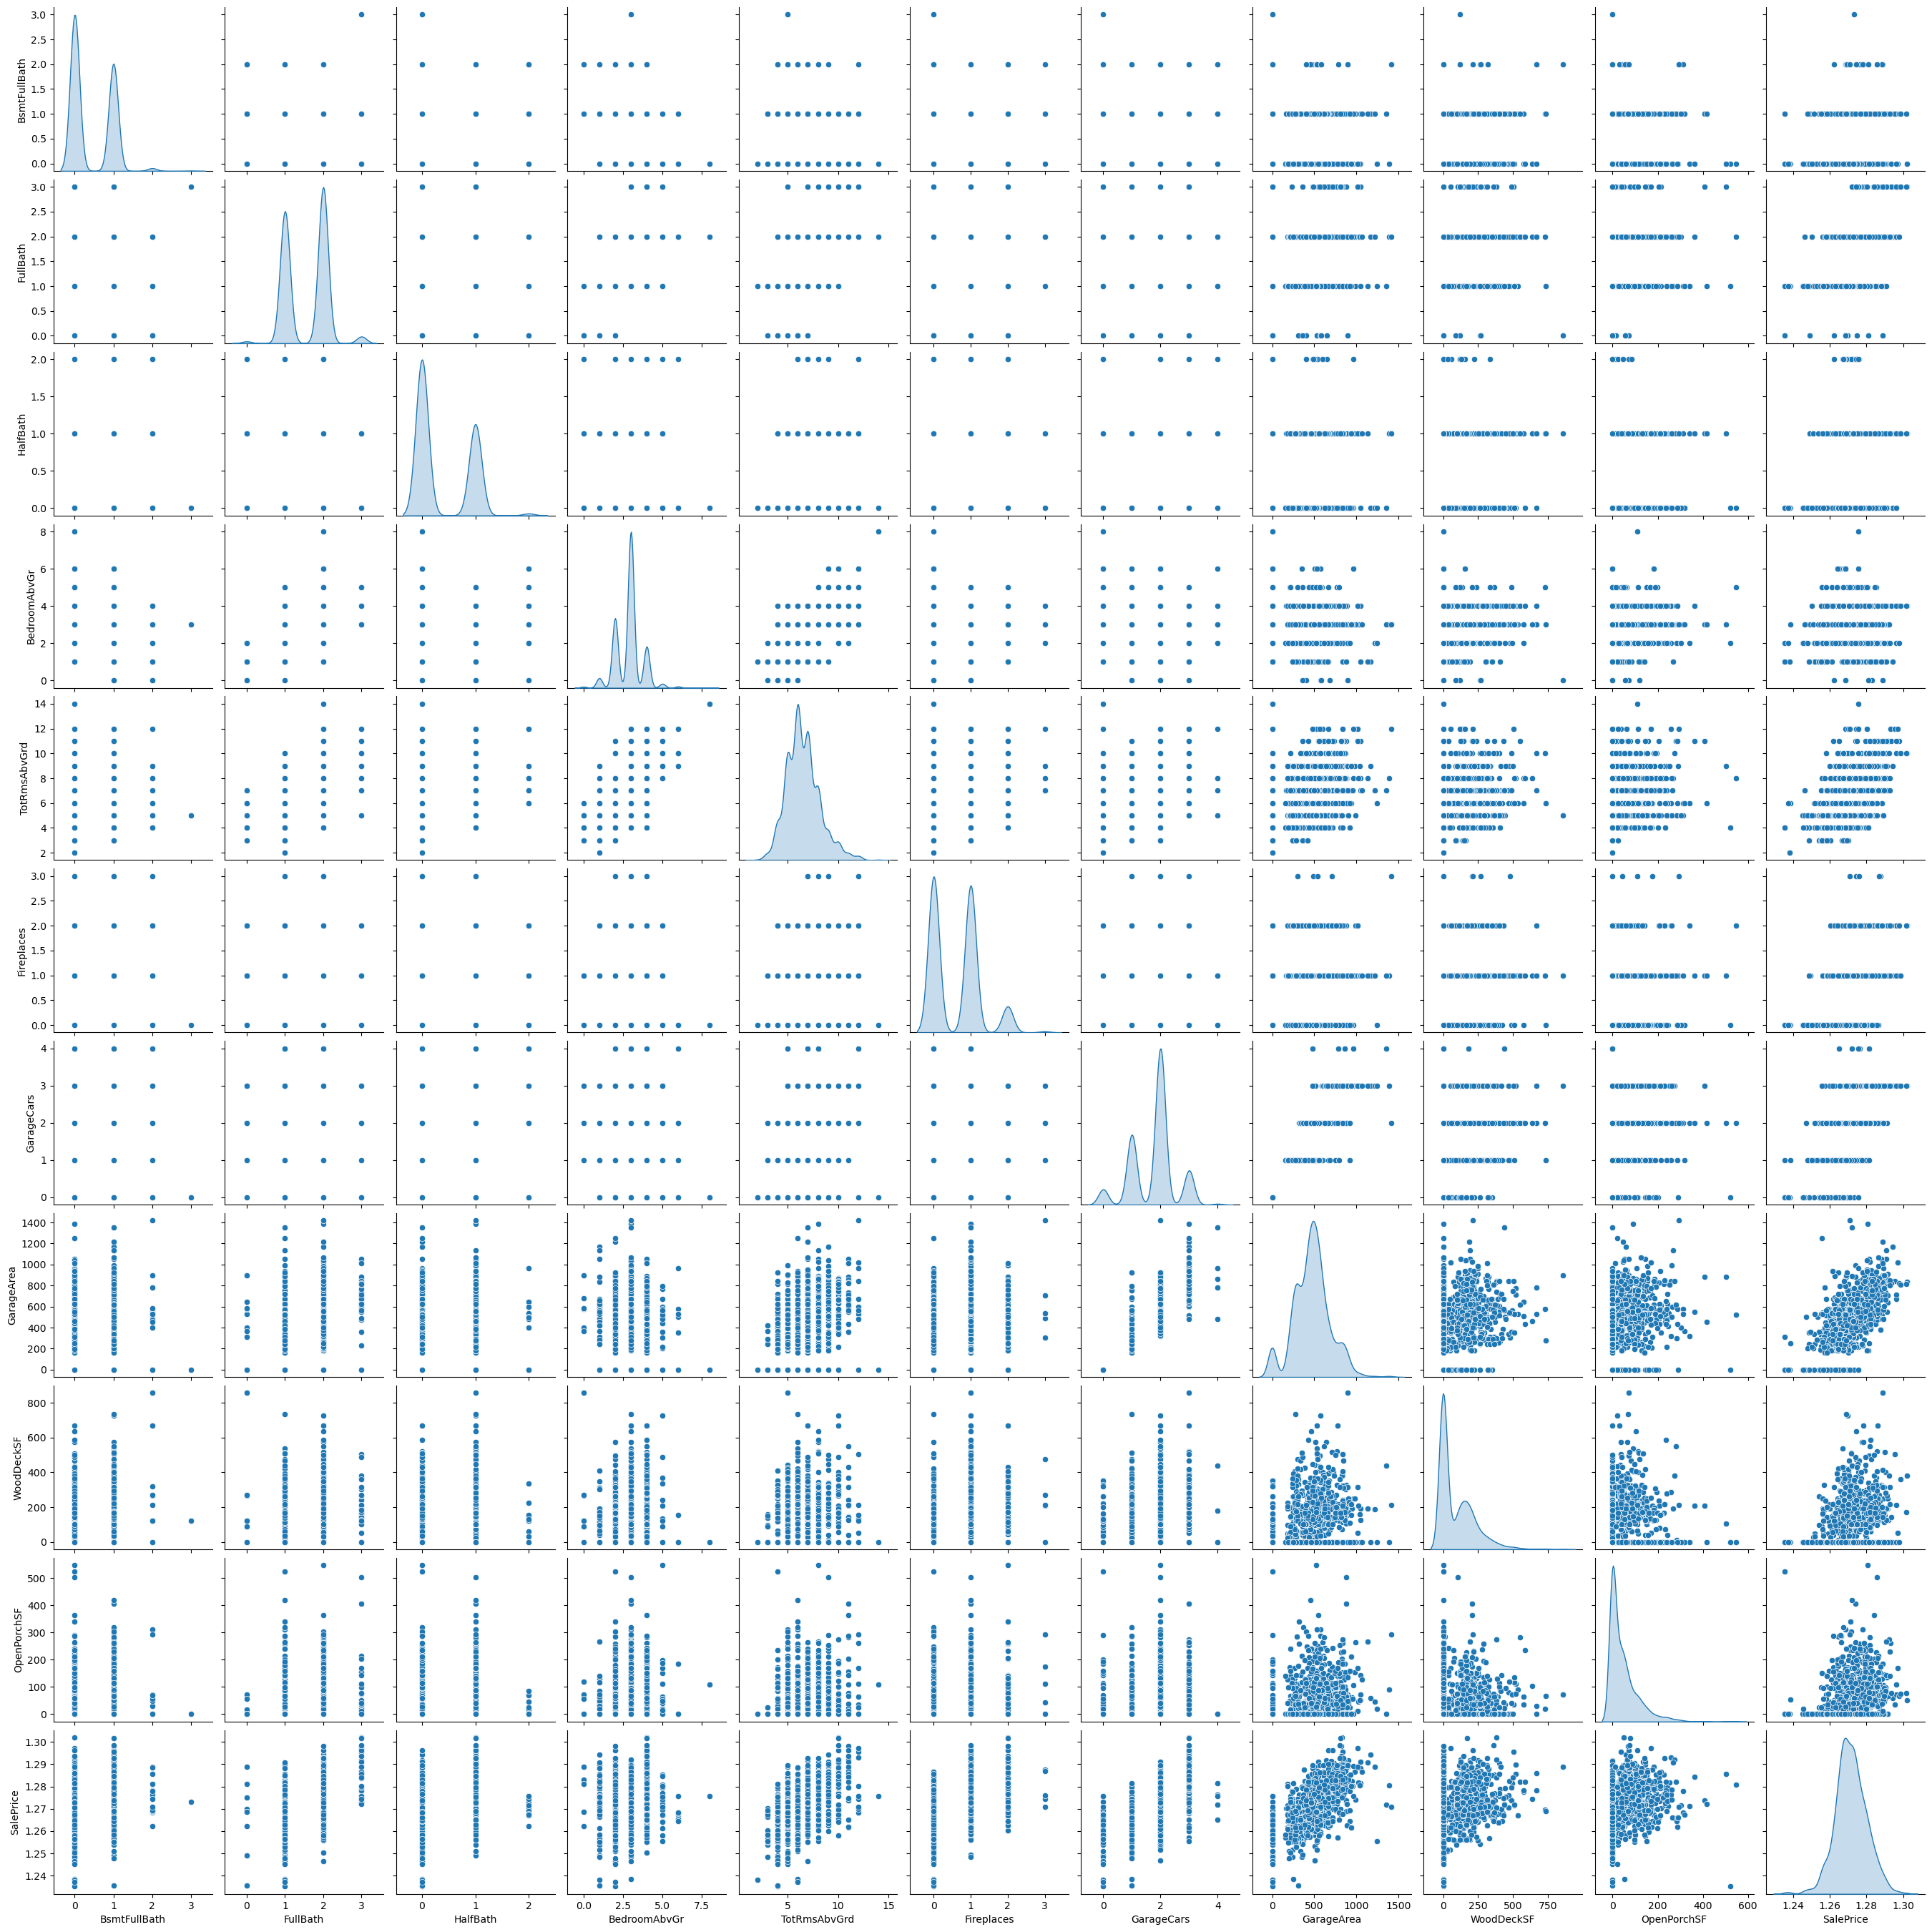

In [168]:
#Plotting them to check the flow of data
sns.pairplot(HPNumb2, diag_kind='kde')
plt.show()

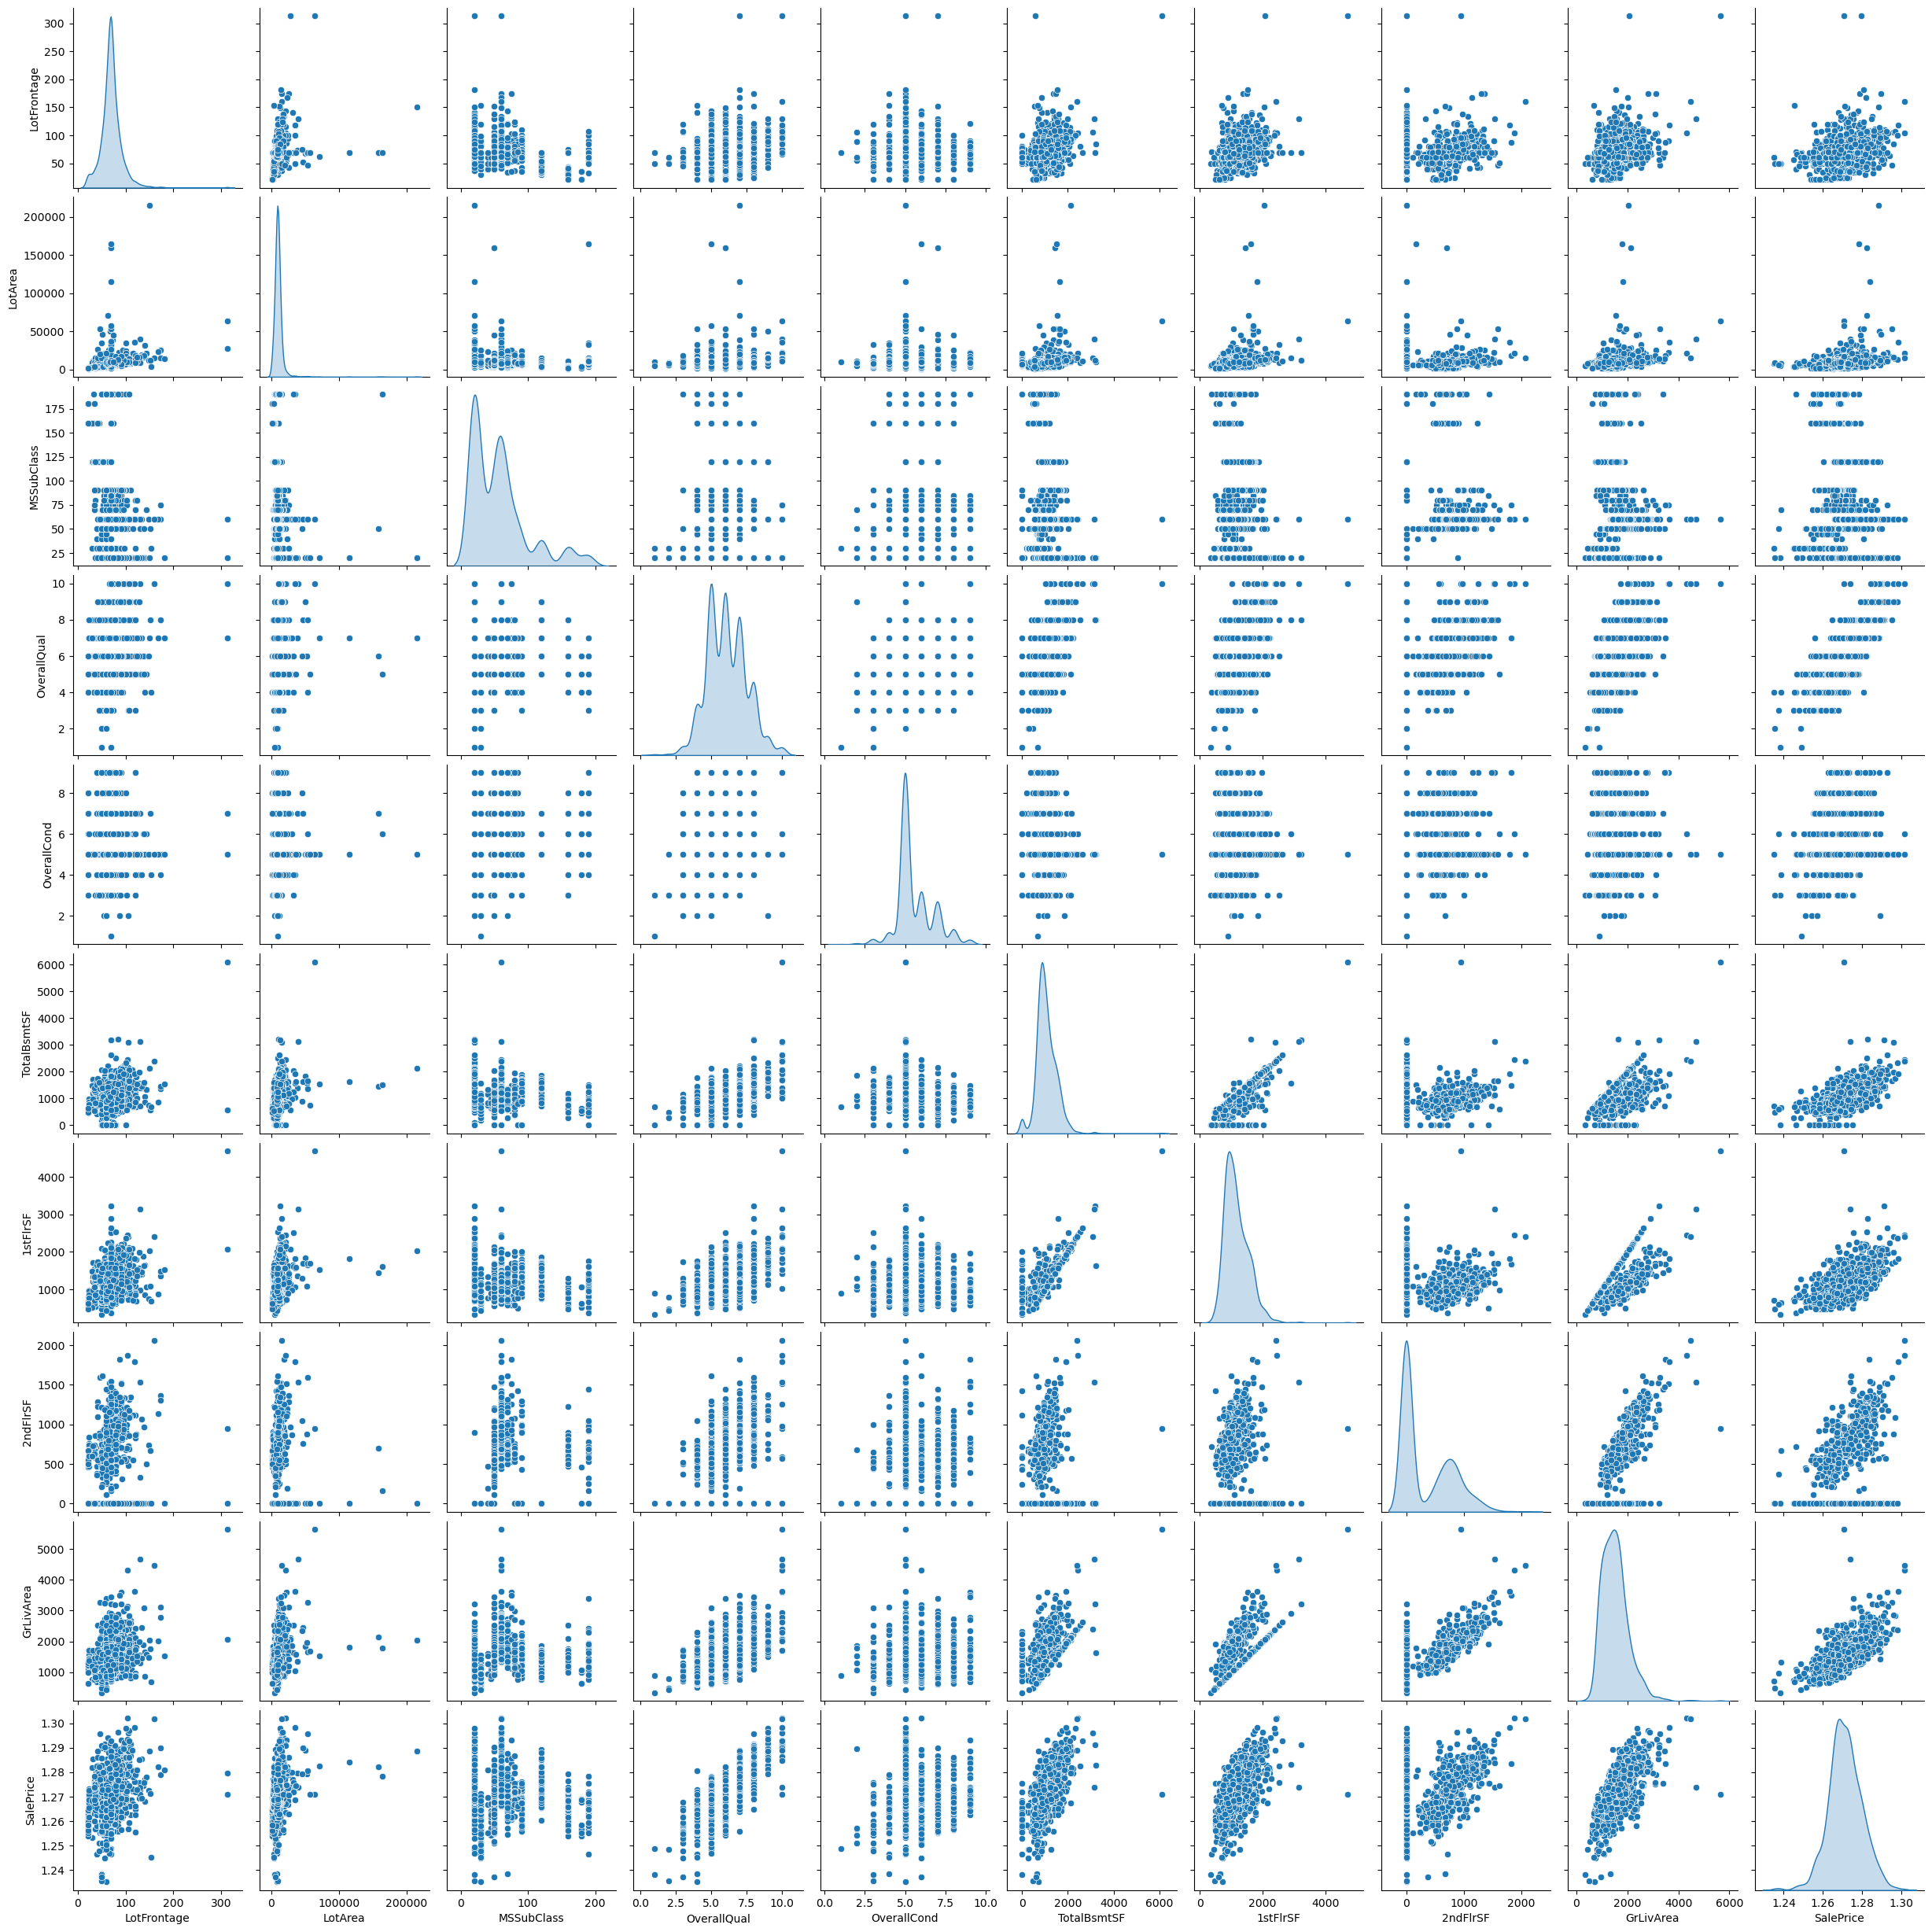

In [169]:
sns.pairplot(HPNumb1, diag_kind='kde')
plt.show()

TotalRmsAbvGr and GrLivArea have .83 correlation 
GarageArea and GarageCars have .88 correlation 
So one of the highly correlated variables needs to be dropped 

In [170]:
HP = HP.drop('TotRmsAbvGrd', axis = 1)
HP = HP.drop('GarageArea', axis = 1)

In [171]:
HP.shape

(1460, 49)

In [172]:
HP.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... GarageCars  WoodDeckSF  \
0       Inside      Coll

In [173]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

### Derived Columns

In [174]:
# Checking all the year related fields to understand whether they can be utilized to derive other variables
HP[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [175]:
# After getting doubt solved in sessions, derived some variables around earlier year related fields
# Dropped the year variables after utilisation of them in creating derived variables
HP['Age'] = HP['YrSold'] - HP['YearBuilt']
HP['Remod_Age'] = HP['YrSold'] - HP['YearRemodAdd']
HP['Garage_Age'] = HP['YrSold'] - HP['GarageYrBlt']
HP = HP.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis= 1)

In [176]:
HP.shape

(1460, 48)

In [177]:
# Getting a different type of the variables tp bring homogenity and treat variables rightly 
HP['ExterQual'] = HP['ExterQual'].astype('category')
HP['BsmtQual'] = HP['BsmtQual'].astype('category')
HP['BsmtCond'] = HP['BsmtCond'].astype('category')
HP['HeatingQC'] = HP['HeatingQC'].astype('category')
HP['KitchenQual'] = HP['KitchenQual'].astype('category')
HP['GarageFinish'] = HP['GarageFinish'].astype('category')
HP['ExterCond'] = HP['ExterCond'].astype('category')
HP['LotShape'] = HP['LotShape'].astype('category')
HP['Neighborhood'] = HP['Neighborhood'].astype('category')

In [178]:
# Mapping variable data tag to numeric value tag for better data set visualisation 
HP['ExterQual'] = HP.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HP['BsmtQual'] = HP.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
HP['BsmtCond'] = HP.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
HP['HeatingQC'] = HP.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HP['KitchenQual'] = HP.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HP['FireplaceQu'] = HP['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
HP['GarageFinish'] = HP.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
HP['ExterCond'] = HP.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HP['LotShape'] = HP.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
HP['Fence'] = HP['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [179]:
HP.shape

(1460, 48)

In [180]:
# Getting dummies for the required parameters 
HPDum = pd.get_dummies(HP[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [181]:
HP.shape

(1460, 48)

In [182]:
# Concatting it in the original dataset
HP = pd.concat([HP, HPDum], axis='columns')

In [183]:
# Dropping now,  not so useful variables
# Not to useful variables: Variables which have been converted into other vairbales and deleting them to have good dataset
HP = HP.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")

In [184]:
HP.shape

(1460, 148)

In [185]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(3), int64(22), uint8(115)
memory usage: 462.3 KB


# Dataset splitting into Training and Testing Datasets

In [186]:
# using Train and Test split getting training and testing data set
df_train, df_test = train_test_split(HP, train_size=0.7,test_size = 0.3, random_state=100)

In [187]:
df_train.shape

(1021, 148)

In [188]:
df_test.shape

(438, 148)

In [189]:
HP[['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]]

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0             60     8450            7            5          856       856   
1             20     9600            6            8         1262      1262   
2             60    11250            7            5          920       920   
3             70     9550            7            5          756       961   
4             60    14260            8            5         1145      1145   
...          ...      ...          ...          ...          ...       ...   
1455          60     7917            6            5          953       953   
1456          20    13175            6            6         1542      2073   
1457          70     9042            7            9         1152      1188   
1458          20     9717            5            6         1078      1078   
1459          20     9937            5            6         1256      1256   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0          854       1710             1         2         1             3   
1            0       1262             0         2         0             3   
2          866       1786             1         2         1             3   
3          756       1717             1         1         0             3   
4         1053       2198             1         2         1             4   
...        ...        ...           ...       ...       ...           ...   
1455       694       1647             0         2         1             3   
1456         0       2073             1         2         0             3   
1457      1152       2340             0         2         0             4   
1458         0       1078             1         1         0             2   
1459         0       1256             1         1         1             3   

      Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  
0              0           2           0           61              0  
1              1           2         298            0              0  
2              1           2           0           42              0  
3              1           3           0           35            272  
4              1           3         192           84              0  
...          ...         ...         ...          ...            ...  
1455           1           2           0           40              0  
1456           2           2         349            0              0  
1457           2           1           0           60              0  
1458           0           1         366            0            112  
1459           0           1         736           68              0  

[1460 rows x 17 columns]

In [190]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

In [191]:
# Standardizing numerical variables using scaler
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [192]:
# Creating X train, y train, X test and y test from df_train and df_test   
X_train = df_train
y_train = df_train.pop('SalePrice')

X_test = df_test
y_test = df_test.pop('SalePrice')

# Linear Regression and RFE

In [193]:
# Linear Regression and RFE process as the number of variables are too high 
HP_lr = LinearRegression()
HP_lr.fit(X_train, y_train)

# running RFE
rfe = RFE(HP_lr)            
rfe = rfe.fit(X_train, y_train)

In [194]:
# Prediction of Target variable
# Getting useful values for better data understanding
y_LR_Pred = HP_lr.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9151604403479037
0.006298754440202539
6.169201214693965e-06
3.0846006073469827e-06


Text(0.5, 0, 'Errors')

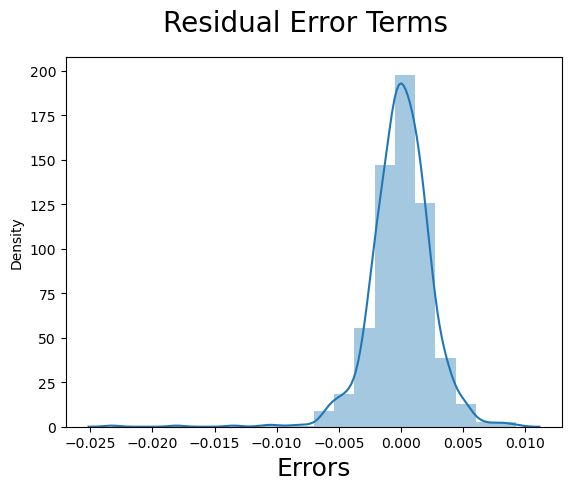

In [195]:
# Plotting the residual error terms on the basis of the residual calculated
y_LR_Pred = HP_lr.predict(X_train)
res = y_train-y_LR_Pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [196]:
# Residual vs predicted values
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [197]:
# Assignment of selected columns by RFe to columns
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

Variable  rfe_support  rfe_ranking
0            OverallQual         True            1
1            OverallCond         True            1
2               BsmtQual         True            1
3               1stFlrSF         True            1
4               2ndFlrSF         True            1
..                   ...          ...          ...
68  Neighborhood_NridgHt         True            1
69  Neighborhood_OldTown         True            1
70  Neighborhood_Somerst         True            1
71  Neighborhood_StoneBr         True            1
72  Neighborhood_Veenker         True            1

[73 rows x 3 columns]

 73 variables were selected for the model

In [198]:
X_train_rfe = X_train[col]

In [199]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building
## Model Evaluations

# Ridge Regresssion

In [200]:
# List of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5 
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
# Cheking the best alpha value for Ridge Regression
ridge_model_cv.best_params_

{'alpha': 5.0}

In [202]:
# checking ridge model on the best aplha value we are getting in the ridge regression model
ridge = Ridge(alpha=5.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.11672871e-03  1.11748858e-03  8.02927090e-04  1.30635986e-03
  1.25828005e-03  1.39928970e-03  8.11185760e-04  8.22025639e-04
  1.29153290e-03  1.90505678e-03  1.93741262e-03  2.86183665e-03
  1.03873882e-03  1.39418986e-03  2.27438324e-03  1.18895563e-03
  9.12900942e-04  1.59406395e-03  6.95472920e-04  9.95934035e-04
  2.89571950e-04  6.88816286e-04 -1.99979700e-03 -5.98598081e-04
  1.44426421e-04 -7.49541539e-04 -1.47955981e-04 -1.22119912e-03
  2.28196717e-03 -4.51502220e-05  4.08613476e-04  1.32069627e-04
  7.08460562e-04  7.98847138e-04  2.16745445e-04 -3.52297036e-04
  1.38244301e-03 -1.36483606e-04  1.14262939e-03 -1.47955981e-04
 -4.51502220e-05  6.88193129e-04 -2.29293142e-04 -1.46034775e-03
 -1.11644849e-03  3.00812269e-04  8.00716101e-04  1.47998935e-03
  4.61336185e-04  4.53672732e-04  2.42019011e-04 -5.05110002e-04
 -1.00961993e-03  8.07099517e-04  4.52923620e-04  1.52839800e-03
  1.08351901e-03  9.17685244e-04  4.86903205e-04  1.03092612e-03
  1.69884056e-03  1.08351

In [203]:
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
16         5.0         -0.001901        -0.002046                1
17         6.0         -0.001907        -0.002047                2
15         4.0         -0.001896        -0.002047                3
18         7.0         -0.001912        -0.002047                4
19         8.0         -0.001917        -0.002048                5
20         9.0         -0.001921        -0.002049                6
14         3.0         -0.001890        -0.002049                7
21        10.0         -0.001926        -0.002050                8
13         2.0         -0.001882        -0.002054                9
12         1.0         -0.001873        -0.002059               10
11         0.9         -0.001872        -0.002059               11
10         0.8         -0.001871        -0.002060               12
9          0.7         -0.001870        -0.002060               13
8          0.6         -0.001869        -0.002060               14
7          0.5         -0.001868        -0.002061               15
6          0.4         -0.001867        -0.002062               16
5          0.3         -0.001866        -0.002063               17
4          0.2         -0.001865        -0.002066               18
22          20         -0.001964        -0.002067               19
3          0.1         -0.001865        -0.002069               20
2         0.01         -0.001865        -0.002073               21
1        0.001         -0.001865        -0.002073               22
0       0.0001         -0.001865        -0.002073               23
23          50         -0.002031        -0.002104               24
24         100         -0.002090        -0.002143               25
25         500         -0.002416        -0.002441               26

In [204]:
# Predicting Train and Test values of Ridge REgression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)


r2_train:
0.8928004850203347
r2_test:
0.86956323647092
RSS_train:
0.007958827506114258
RSS_test:
0.004371888114425635
MSE_train:
7.795129780719157e-06
MSE_test:
9.981479713300536e-06


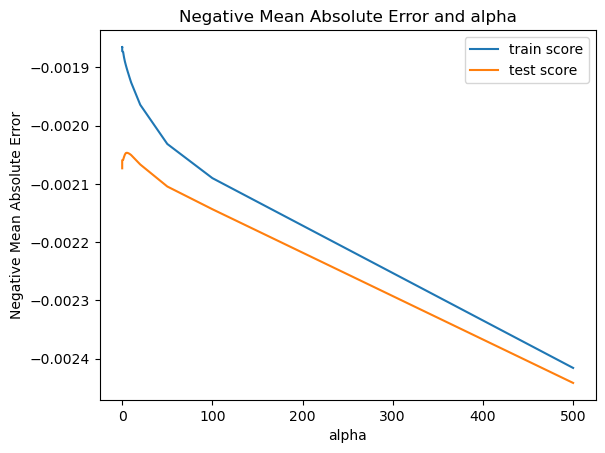

In [205]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting graohs for Ridge Regression

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [206]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual       0.0021
1            OverallCond       0.0011
2               BsmtQual       0.0008
3               1stFlrSF       0.0013
4               2ndFlrSF       0.0013
..                   ...          ...
68  Neighborhood_NridgHt       0.0021
69  Neighborhood_OldTown      -0.0013
70  Neighborhood_Somerst       0.0023
71  Neighborhood_StoneBr       0.0010
72  Neighborhood_Veenker       0.0013

[73 rows x 2 columns]

In [207]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
0            OverallQual  1.258511
12           MSZoning_RM  0.002862
64  Neighborhood_Edwards  0.002465
63  Neighborhood_Crawfor  0.002345
71  Neighborhood_StoneBr  0.002331
29    Exterior1st_CBlock  0.002282
15       LandContour_Lvl  0.002274
1            OverallCond  0.002117
69  Neighborhood_OldTown  0.002107
11           MSZoning_RL  0.001937

# Lasso Regression

In [208]:
HP_lr = Lasso(alpha=0.001)
HP_lr.fit(X_train,y_train)

y_train_pred = HP_lr.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = HP_lr.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7667884601860405
0.7787417678177453


In [209]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [210]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [211]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [212]:
lasso.coef_

array([ 2.69437628e-03,  9.54178287e-04,  1.03538993e-03,  6.75240298e-04,
        0.00000000e+00,  2.17658312e-03,  7.40717833e-04,  9.83042051e-04,
        1.60808452e-03,  0.00000000e+00,  0.00000000e+00,  7.31948324e-04,
       -1.87877939e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.32035753e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        4.15360503e-04, -1.77706844e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.98170102e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.17511200e-03,  

In [213]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.8512157241109406
r2_test:
0.8589370035846926
RSS_train:
0.011046210308393277
RSS_test:
0.004728050748329528
MSE_train:
1.0819011075801447e-05
MSE_test:
1.079463641171125e-05


In [214]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.016128      0.001533         0.009514        0.006075       0.0001   
1       0.009727      0.007777         0.009873        0.008062       0.0010   
2       0.017370      0.002200         0.010599        0.003815       0.0100   
3       0.007121      0.007607         0.007539        0.007715       0.1000   
4       0.005836      0.007235         0.011282        0.009383       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.002158          -0.002363          -0.002344   
1   {'alpha': 0.001}          -0.002819          -0.003029          -0.002926   
2    {'alpha': 0.01}          -0.006731          -0.006720          -0.006589   
3     {'alpha': 0.1}          -0.006731          -0.006720          -0.006589   
4     {'alpha': 0.2}          -0.006731          -0.006720          -0.006589   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.002171  ...        -0.002252        0.000086                1   
1          -0.002948  ...        -0.002929        0.000067                2   
2          -0.006388  ...        -0.006678        0.000187                3   
3          -0.006388  ...        -0.006678        0.000187                3   
4          -0.006388  ...        -0.006678        0.000187                3   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.002253           -0.002127           -0.002170   
1           -0.002949           -0.002833           -0.002879   
2           -0.006659           -0.006645           -0.006683   
3           -0.006659           -0.006645           -0.006683   
4           -0.006659           -0.006645           -0.006683   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.002247           -0.002208         -0.002201         0.000048  
1           -0.002927           -0.003000         -0.002917         0.000057  
2           -0.006728           -0.006603         -0.006663         0.000041  
3           -0.006728           -0.006603         -0.006663         0.000041  
4           -0.006728           -0.006603         -0.006663         0.000041  

[5 rows x 21 columns]

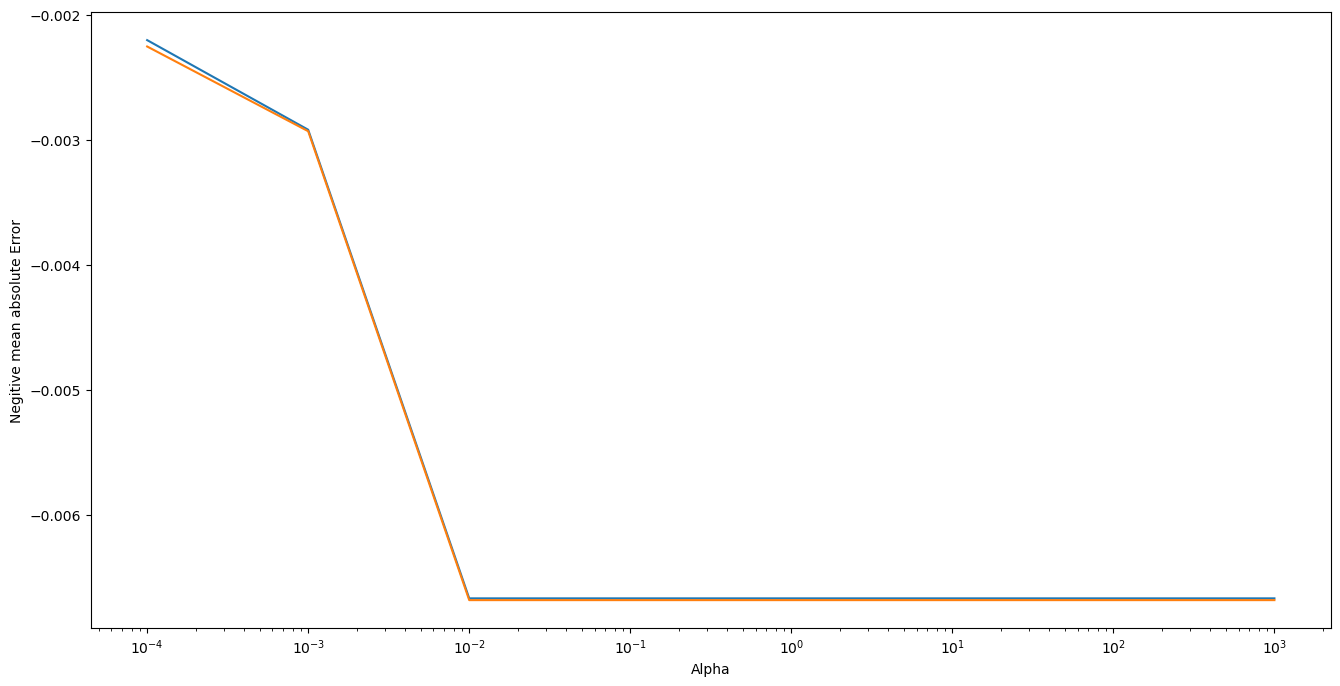

In [215]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [216]:
#checking for 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7667884601860405
0.7787417678177453


In [217]:
#getting top 10 parameters from Lasso and deducing features for model
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
0        MSSubClass  1.268983
1       LotFrontage  0.003434
6         ExterQual  0.001588
9          BsmtCond  0.001327
4       OverallQual  0.000757
3          LotShape  0.000713
7         ExterCond  0.000130
48  Condition1_RRAn  0.000000
54  BldgType_TwnhsE  0.000000
53   BldgType_Twnhs -0.000000

In [218]:
# Put the shortlisted Features and coefficients in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0   OverallQual       0.0034
1      BsmtQual       0.0007
2      1stFlrSF       0.0008
3     GrLivArea       0.0016
4  BsmtFullBath       0.0001
5    GarageCars       0.0013

In [219]:
#comparing Ridge and lasso performance
resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.892800          0.851216
1    R2Score Test          0.869563          0.858937
2       RSS Train          0.007959          0.011046
3        RSS Test          0.004372          0.004728
4       MSE Train          0.000008          0.000011
5        MSE Test          0.000010          0.000011

In [220]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.17970847e-03  1.11918248e-03  8.25348624e-04  1.27543036e-03
  1.12365601e-03  1.46249117e-03  8.13600173e-04  8.56729042e-04
  1.32577562e-03  1.32594335e-03  1.02517287e-03  2.08947822e-03
  9.04528640e-05  1.04884315e-03  1.81230681e-03  8.89530054e-04
  9.02868426e-04  1.47799501e-03  4.67756837e-04  7.17038260e-04
  1.34172875e-04  3.89092788e-04 -1.70250608e-03 -4.90033245e-04
  6.07654199e-05 -6.30465577e-04 -1.03199408e-04 -7.60178901e-04
  1.81439387e-03 -4.82715847e-05  1.91589340e-04  5.09055699e-05
  4.56967370e-04  5.52789317e-04  5.18329940e-05 -6.10945803e-04
  1.10293173e-03 -3.72531556e-04  6.78492752e-04 -1.03199408e-04
 -4.82715847e-05  3.43992852e-04 -9.47790385e-05 -1.23918930e-03
 -8.71904409e-04  2.97027032e-04  6.49072702e-04  1.33909315e-03
  3.36267491e-04  2.22834361e-04  1.30471326e-04 -4.06706135e-04
 -1.02870506e-03  5.17619817e-04  3.06025044e-04  9.40956882e-04
  9.99340908e-04  5.48529905e-04  2.51905518e-04  7.61533633e-04
  1.56613603e-03  9.99340

In [221]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.889095061165231
r2_test:
0.8711191900588353
RSS_train:
0.008233929770386682
RSS_test:
0.0043197367514696845
MSE_train:
8.064573722220061e-06
MSE_test:
9.86241267458832e-06


In [222]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual       0.0022
1            OverallCond       0.0011
2               BsmtQual       0.0008
3               1stFlrSF       0.0013
4               2ndFlrSF       0.0011
..                   ...          ...
68  Neighborhood_NridgHt       0.0017
69  Neighborhood_OldTown      -0.0012
70  Neighborhood_Somerst       0.0019
71  Neighborhood_StoneBr       0.0006
72  Neighborhood_Veenker       0.0009

[73 rows x 2 columns]

In [223]:
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
0             OverallQual  1.260047
1             OverallCond  0.002180
12            MSZoning_RM  0.002089
64   Neighborhood_Edwards  0.002089
63   Neighborhood_Crawfor  0.001978
71   Neighborhood_StoneBr  0.001928
29     Exterior1st_CBlock  0.001814
15        LandContour_Lvl  0.001812
69   Neighborhood_OldTown  0.001722
61  SaleCondition_Partial  0.001566

In [224]:
HP_lr = Lasso(alpha=0.0002)
HP_lr.fit(X_train,y_train)

#r2 train
y_train_pred = HP_lr.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = HP_lr.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8386537324030342
0.8506190920961669


In [225]:
y_pred_train = HP_lr.predict(X_train)
y_pred_test = HP_lr.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.8386537324030342
r2_test:
0.8506190920961669
RSS_train:
0.01197885188942496
RSS_test:
0.0050068446818007685
MSE_train:
1.1732470019025425e-05
MSE_test:
1.1431152241554266e-05


In [226]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':HP_lr.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0           OverallQual       0.0029
1           OverallCond       0.0007
2              BsmtQual       0.0011
3              1stFlrSF       0.0007
4             GrLivArea       0.0021
5          BsmtFullBath       0.0007
6           KitchenQual       0.0010
7            GarageCars       0.0016
8           MSZoning_RL       0.0007
9           MSZoning_RM      -0.0012
10  Exterior1st_VinylSd       0.0001
11     Foundation_PConc       0.0001
12    GarageType_Detchd      -0.0010

In [227]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':HP_lr.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0           OverallQual       0.0029
1           OverallCond       0.0007
2              BsmtQual       0.0011
3              1stFlrSF       0.0007
4             GrLivArea       0.0021
5          BsmtFullBath       0.0007
6           KitchenQual       0.0010
7            GarageCars       0.0016
8           MSZoning_RL       0.0007
9           MSZoning_RM      -0.0012
10  Exterior1st_VinylSd       0.0001
11     Foundation_PConc       0.0001
12    GarageType_Detchd      -0.0010

In [228]:
resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.889095          0.838654
1    R2Score Test          0.871119          0.850619
2       RSS Train          0.008234          0.011979
3        RSS Test          0.004320          0.005007
4       MSE Train          0.000008          0.000012
5        MSE Test          0.000010          0.000011

### End of Code